# **[명량 감독 - 김한민]**
feat. 활

In [1]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

     |████████████████████████████████| 958 kB 17.6 MB/s 
     |████████████████████████████████| 138 kB 49.8 MB/s 
     |████████████████████████████████| 356 kB 46.1 MB/s 
     |████████████████████████████████| 3.6 MB 3.8 MB/s 
     |████████████████████████████████| 55 kB 1.2 MB/s 
     |████████████████████████████████| 54 kB 1.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/

In [2]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait   
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver', options=options)

movie_id = '61482'
URL = 'https://movie.daum.net/moviedb/grade?movieId=' + movie_id

browser.get(URL)

try:   
    review = WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )    

except TimeoutException:    
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

review = browser.find_element_by_class_name('desc_txt')

review.text


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


'굉장히 멋진 작품입니다. 몇번을 반복해봐도 질리지않아요. 아무리 히트친 작품이라도 반복해서 보기 힘들잖아요?\n이런걸 두고 명작이라고하죠.  '

*첫번째 리뷰의 영화 평점 (별점) 

In [3]:
first_score = browser.find_element_by_class_name('ratings')
first_score.text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


'10'

*한 페이지의 모든 리뷰 가져오기

In [4]:
reviews = browser.find_elements_by_class_name('desc_txt')
scores = browser.find_elements_by_class_name('ratings')

for review in reviews:
  print('>>', review.text.replace('\n', ' '))

for score in scores:
  print(score.text, end='점, ')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


>> 굉장히 멋진 작품입니다. 몇번을 반복해봐도 질리지않아요. 아무리 히트친 작품이라도 반복해서 보기 힘들잖아요? 이런걸 두고 명작이라고하죠.  
>> 이 영화보고 표절이라고 하는거 이해가 안간다. 한명이 여럿 상대하며 쫓기면 같은 영화인가?  병자호란의 치욕을 잘 표현해서 재밌었다. 흥미진진하고 긴박한 전개에 딴생각할 틈이 없었다.
>> 오  뛰어난 작품🏹
>> 이 영화가 표절이면 데이빗핀쳐의 조디악은 살인의 추억 복사한거야
>> 재미만 있구만
>> 다시 봐도 질리지 않는 수작. 명대사 명연기 발군의 연출 긴장감 있는 배경음악  어느것 하나 나무랄데가 없음
>> 내용은 단순하지만 잠시도 눈을 뛸 수 없는 박진감 연휴 잘보냄
>> 지금봐도 지루할틈 없이 재미있다.
>> 굉장히 멋진 작품입니다. 영화를 보면서 우리 선조들의 아픔을 느낄수 있었습니다.
>> 제 인생 영화 중에 한 편인 듯 하네요.  2년에 한번은 보는 듯.  인생 처음으로 평점 남깁니다.
10점, 9점, 9점, 10점, 10점, 10점, 10점, 10점, 10점, 10점, 

In [5]:
#리뷰의 수와 별점의 수가 동일한지 확인하기

print('\n영화 리뷰 수 : ', len(reviews), '\n영화 별점 수 : ', len(scores))


영화 리뷰 수 :  10 
영화 별점 수 :  10


In [6]:
# 리뷰 관련 모든 정보를 가져온다.
review_elems = browser.find_elements_by_class_name('cmt_info')

ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트


try:    
    review = WebDriverWait(browser, 20).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )   

except TimeoutException:  
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

# 영화 리뷰 관련 모든 정보를 가져와서 리스트에 담는다.
for review_elem in review_elems:
  
  ratings.append(review_elem.find_element_by_class_name('ratings').text)
  try:
    comments.append(review_elem.find_element_by_class_name('desc_txt').text.replace('\n', ' '))
  except NoSuchElementException:
    comments.append('')

for i, score in enumerate(ratings):
  print(f'{score}점, 리뷰: {comments[i]}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


10점, 리뷰: 굉장히 멋진 작품입니다. 몇번을 반복해봐도 질리지않아요. 아무리 히트친 작품이라도 반복해서 보기 힘들잖아요? 이런걸 두고 명작이라고하죠.  
9점, 리뷰: 이 영화보고 표절이라고 하는거 이해가 안간다. 한명이 여럿 상대하며 쫓기면 같은 영화인가?  병자호란의 치욕을 잘 표현해서 재밌었다. 흥미진진하고 긴박한 전개에 딴생각할 틈이 없었다.
9점, 리뷰: 오  뛰어난 작품🏹
10점, 리뷰: 이 영화가 표절이면 데이빗핀쳐의 조디악은 살인의 추억 복사한거야
10점, 리뷰: 재미만 있구만
10점, 리뷰: 다시 봐도 질리지 않는 수작. 명대사 명연기 발군의 연출 긴장감 있는 배경음악  어느것 하나 나무랄데가 없음
10점, 리뷰: 내용은 단순하지만 잠시도 눈을 뛸 수 없는 박진감 연휴 잘보냄
10점, 리뷰: 지금봐도 지루할틈 없이 재미있다.
10점, 리뷰: 굉장히 멋진 작품입니다. 영화를 보면서 우리 선조들의 아픔을 느낄수 있었습니다.
10점, 리뷰: 제 인생 영화 중에 한 편인 듯 하네요.  2년에 한번은 보는 듯.  인생 처음으로 평점 남깁니다.


* [시각화] 스코어의 점수를 별의 갯수로 표현해보기

In [7]:
for i, score in enumerate(ratings):
    for j in range(int(int(score)/2)) :
        print('★', end = ' ')
    print(f' - {comments[i]}')
    print('')

★ ★ ★ ★ ★  - 굉장히 멋진 작품입니다. 몇번을 반복해봐도 질리지않아요. 아무리 히트친 작품이라도 반복해서 보기 힘들잖아요? 이런걸 두고 명작이라고하죠.  

★ ★ ★ ★  - 이 영화보고 표절이라고 하는거 이해가 안간다. 한명이 여럿 상대하며 쫓기면 같은 영화인가?  병자호란의 치욕을 잘 표현해서 재밌었다. 흥미진진하고 긴박한 전개에 딴생각할 틈이 없었다.

★ ★ ★ ★  - 오  뛰어난 작품🏹

★ ★ ★ ★ ★  - 이 영화가 표절이면 데이빗핀쳐의 조디악은 살인의 추억 복사한거야

★ ★ ★ ★ ★  - 재미만 있구만

★ ★ ★ ★ ★  - 다시 봐도 질리지 않는 수작. 명대사 명연기 발군의 연출 긴장감 있는 배경음악  어느것 하나 나무랄데가 없음

★ ★ ★ ★ ★  - 내용은 단순하지만 잠시도 눈을 뛸 수 없는 박진감 연휴 잘보냄

★ ★ ★ ★ ★  - 지금봐도 지루할틈 없이 재미있다.

★ ★ ★ ★ ★  - 굉장히 멋진 작품입니다. 영화를 보면서 우리 선조들의 아픔을 느낄수 있었습니다.

★ ★ ★ ★ ★  - 제 인생 영화 중에 한 편인 듯 하네요.  2년에 한번은 보는 듯.  인생 처음으로 평점 남깁니다.



* 평점 더보기 버튼을 자동으로 눌러 모든 리뷰&별점 가져오기

In [8]:
print('Unfolding movie review pages:')
click = 0  
print('Counting pages...')

XPATH = '''//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'''
while True:
  try: 
    WebDriverWait(browser, 10).until(EC.presence_of_element_located(
      (By.XPATH, XPATH))).click()
      
    click += 1
    print(click) if click % 20 == 0 else print(click, end='|')
  except TimeoutException: 
    print('Done!')
    break

Unfolding movie review pages:
Counting pages...
1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20
21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36|37|38|39|40
41|42|43|44|45|46|47|48|49|50|51|52|53|54|55|56|57|58|59|60
61|62|63|64|65|66|67|68|69|70|71|72|73|74|75|76|77|78|79|80
81|82|83|84|85|86|87|88|89|90|91|92|93|94|95|96|97|98|99|100
101|102|103|104|105|106|Done!


In [9]:
ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트

print('Extracting movie reviews...')
review_elems = browser.find_elements_by_class_name('cmt_info')
for review_elem in review_elems:

  ratings.append(review_elem.find_element(By.CLASS_NAME, 'ratings').text)
  try:
    comments.append(review_elem.find_element(By.CLASS_NAME, 
                        'desc_txt').text.replace('\n', ' '))
  except:
    comments.append('')
else:
  print('\n--- Job completed!', 
        f'총 {len(review_elems):,}개의 리뷰 데이터를 수집했습니다.', 
        '-' * 11, '\n') 

Extracting movie reviews...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """



--- Job completed! 총 3,160개의 리뷰 데이터를 수집했습니다. ----------- 



In [10]:
print(f'총 리뷰 개수.......: {len(comments):,}개')
print(f'총 리뷰 평점 개수...: {len(ratings):,}개')

for i, score in enumerate(ratings[:10]):
  print(f'{score} - {comments[i]}')

filename_reviews = 'movie-reviews.txt'

with open(filename_reviews, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
    file.write(score + '|')           
    file.write(comments[i] + '\n')  
      
print(f"수집한 데이터를 '{filename_reviews}'로 저장하였습니다.")

from google.colab import files
files.download('movie-reviews.txt')

총 리뷰 개수.......: 3,160개
총 리뷰 평점 개수...: 3,160개
10 - 굉장히 멋진 작품입니다. 몇번을 반복해봐도 질리지않아요. 아무리 히트친 작품이라도 반복해서 보기 힘들잖아요? 이런걸 두고 명작이라고하죠.  
9 - 이 영화보고 표절이라고 하는거 이해가 안간다. 한명이 여럿 상대하며 쫓기면 같은 영화인가?  병자호란의 치욕을 잘 표현해서 재밌었다. 흥미진진하고 긴박한 전개에 딴생각할 틈이 없었다.
9 - 오  뛰어난 작품🏹
10 - 이 영화가 표절이면 데이빗핀쳐의 조디악은 살인의 추억 복사한거야
10 - 재미만 있구만
10 - 다시 봐도 질리지 않는 수작. 명대사 명연기 발군의 연출 긴장감 있는 배경음악  어느것 하나 나무랄데가 없음
10 - 내용은 단순하지만 잠시도 눈을 뛸 수 없는 박진감 연휴 잘보냄
10 - 지금봐도 지루할틈 없이 재미있다.
10 - 굉장히 멋진 작품입니다. 영화를 보면서 우리 선조들의 아픔을 느낄수 있었습니다.
10 - 제 인생 영화 중에 한 편인 듯 하네요.  2년에 한번은 보는 듯.  인생 처음으로 평점 남깁니다.
수집한 데이터를 'movie-reviews.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*수집한 모든 데이터들 - 긍정 v.s 부정 코멘트로 분류하기

In [11]:
pos_comments = []  # 긍정 리뷰들
neg_comments = []  # 부정 리뷰들

filename = 'movie-reviews-senti.txt'  
with open(filename, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
   
    grade = int(score)
    if 5 < grade < 9: continue            # 평점이 6~8인 리뷰는 제외

    if len(comments[i]) < 4: continue     # 내용이 너무 짧은 리뷰는 제외

    if grade >= 9:                        # 긍정 리뷰면 '1'이라는 라벨 부여
      label = '1 '                         
      pos_comments.append(comments[i])    # 긍정 리뷰를 긍정 리뷰 리스트에 추가한다.

    else:                                 # 부정 리뷰면 '0'이라는 라벨 부여
      label = '0 '                        
      neg_comments.append(comments[i])    # 부정 리뷰를 부정 리뷰 리스트에 추가한다.            
    
    file.write(label + '| ')               # 긍정 또는 부정 라벨을 텍스트 파일로 쓴 후 각 리뷰를 줄 단위로 텍스트 파일에 쓴다.
    file.write(comments[i] + '\n')        
  else:
    print(f'긍정 리뷰 개수: {len(pos_comments):,}개\n부정 리뷰 개수: {len(neg_comments):,}개')

print(f"분류한 데이터를 '{filename}'로 저장하였습니다.")

from google.colab import files
files.download(filename)

print(f'긍정 리뷰...: {len(pos_comments):,}개')
for review in pos_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')

print(f'부정 리뷰...: {len(neg_comments):,}개')
for review in neg_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')


print(f'리뷰 총계...: {len(pos_comments) + len(neg_comments):,}개')

긍정 리뷰 개수: 1,857개
부정 리뷰 개수: 380개
분류한 데이터를 'movie-reviews-senti.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

긍정 리뷰...: 1,857개
	 굉장히 멋진 작품입니다. 몇번을 반복해봐도 질리지않아요. 아무리 히트친 작품이라도 반복해서 보기 힘들잖아요? 이런걸 두고 명작이라고하죠.  
	 이 영화보고 표절이라고 하는거 이해가 안간다. 한명이 여럿 상대하며 쫓기면 같은 영화인가?  병자호란의 치욕을 잘 표현해서 재밌었다. 흥미진진하고 긴박한 전개에 딴생각할 틈이 없었다.
	 오  뛰어난 작품🏹
	 이 영화가 표절이면 데이빗핀쳐의 조디악은 살인의 추억 복사한거야
	 재미만 있구만
	 다시 봐도 질리지 않는 수작. 명대사 명연기 발군의 연출 긴장감 있는 배경음악  어느것 하나 나무랄데가 없음
	 내용은 단순하지만 잠시도 눈을 뛸 수 없는 박진감 연휴 잘보냄
	 지금봐도 지루할틈 없이 재미있다.
	 굉장히 멋진 작품입니다. 영화를 보면서 우리 선조들의 아픔을 느낄수 있었습니다.
	 제 인생 영화 중에 한 편인 듯 하네요.  2년에 한번은 보는 듯.  인생 처음으로 평점 남깁니다.
	 ...

부정 리뷰...: 380개
	 너무 똑같다. 아포칼립토
	 사극액션도 활하나가지고 재미있게 만들수 있구나!~
	 연출까지 아포칼립토를 그대로 배낀 영화  이건 뭐 표절 수준이 아니잖아...
	 얼빠진 연기, 얼빠진 적, 얼빠진 아포칼립토
	 사실주의 영화인 줄 알았는데 오락 영화네
	  아포칼립토
	 완전 아포칼립토 판박이네 솔직히 표절아닌가?!
	 아포칼립토 표절
	 활이란 무기의 표현이 아름다웠다. 다른 건 글쎄….
	 과대 평가 된 짜다리 별 재미없는 영화.
	 ...

리뷰 총계...: 2,237개


*워드 클라우드로 영화 리뷰 시각화하기

In [12]:
!python -m pip install konlpy
import konlpy 
print('KoNLPy version...:', konlpy.__version__)

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 32.0 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 127 kB 64.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


KoNLPy version...: 0.5.2


In [13]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 긍정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in pos_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(500)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 76 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155589 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


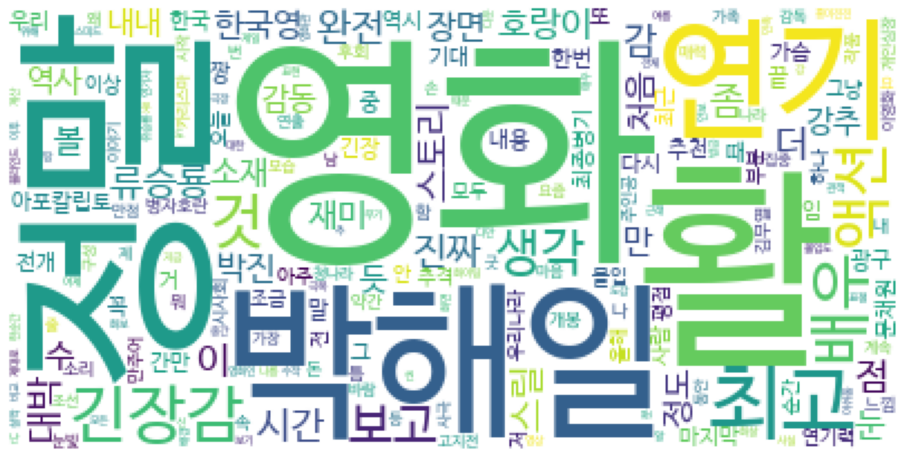

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

In [15]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 부정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in neg_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(500)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


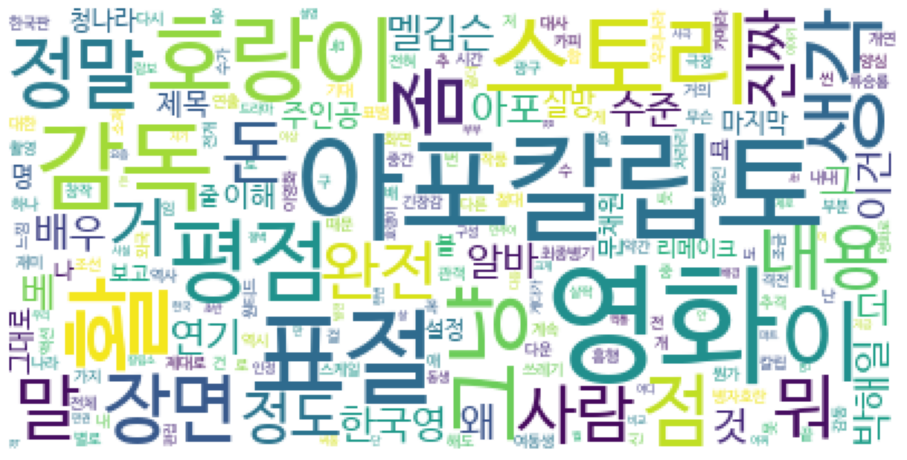

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

# **[신과함께-죄와 벌 감독 - 김용화]**
feat. 신과함께-인과 연

In [17]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait   
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver', options=options)

movie_id = '120166'
URL = 'https://movie.daum.net/moviedb/grade?movieId=' + movie_id

browser.get(URL)

try:   
    review = WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )    

except TimeoutException:    
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

review = browser.find_element_by_class_name('desc_txt')

review.text


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


'신함 3도 엄청 기대됩니다.'

* 첫번째 영화 리뷰 평점(별점)

In [18]:
first_score = browser.find_element_by_class_name('ratings')
first_score.text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


'10'

* 첫 번째 페이지 모든 리뷰 가져오기

In [19]:
reviews = browser.find_elements_by_class_name('desc_txt')
scores = browser.find_elements_by_class_name('ratings')

for review in reviews:
  print('>>', review.text.replace('\n', ' '))

for score in scores:
  print(score.text, end='점, ')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


>> 신함 3도 엄청 기대됩니다.
>> 1~2편 모두 감동적이다. 신파? 눈물나게 만들면 신파냐?? 10점 왜 안눌리지?
>> 마지막 반전 굿이다 전후편 다 훌륭하다
>> 최근에 또봤는데 또 재밌다
>> 주지훈 잘생겼다
>> .
>> 주지훈 하얀삵 연기만으로도 훌륭함^^
>> 주지훈 왜케 멋있는거야~~~♡
>> 1편2편 모두 재미있었습니다. 3편은 언제 나올까요???
>> ㅇㅅㅇ
10점, 9점, 9점, 7점, 10점, 10점, 10점, 10점, 10점, 10점, 

In [20]:
# 리뷰의 수와 별점의 수가 동일한 지 확인하기

print('\n영화 리뷰 수 : ', len(reviews), '\n영화 별점 수 : ', len(scores))


영화 리뷰 수 :  10 
영화 별점 수 :  10


In [21]:
# 리뷰 관련 모든 정보를 가져온다.
review_elems = browser.find_elements_by_class_name('cmt_info')

ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트


try:    
    review = WebDriverWait(browser, 20).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )   

except TimeoutException:  
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

# 영화 리뷰 관련 모든 정보를 가져와서 리스트에 담는다.
for review_elem in review_elems:
  
  ratings.append(review_elem.find_element_by_class_name('ratings').text)
  try:
    comments.append(review_elem.find_element_by_class_name('desc_txt').text.replace('\n', ' '))
  except NoSuchElementException:
    comments.append('')

for i, score in enumerate(ratings):
  print(f'{score}점, 리뷰: {comments[i]}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


10점, 리뷰: 신함 3도 엄청 기대됩니다.
9점, 리뷰: 1~2편 모두 감동적이다. 신파? 눈물나게 만들면 신파냐?? 10점 왜 안눌리지?
9점, 리뷰: 마지막 반전 굿이다 전후편 다 훌륭하다
7점, 리뷰: 최근에 또봤는데 또 재밌다
10점, 리뷰: 주지훈 잘생겼다
10점, 리뷰: .
10점, 리뷰: 주지훈 하얀삵 연기만으로도 훌륭함^^
10점, 리뷰: 주지훈 왜케 멋있는거야~~~♡
10점, 리뷰: 1편2편 모두 재미있었습니다. 3편은 언제 나올까요???
10점, 리뷰: ㅇㅅㅇ


* [시각화] 스코어의 점수를 별의 갯수로 표현해보기

In [22]:
for i, score in enumerate(ratings):
    for j in range(int(int(score)/2)) :
        print('★', end = ' ')
    print(f' - {comments[i]}')
    print('')

★ ★ ★ ★ ★  - 신함 3도 엄청 기대됩니다.

★ ★ ★ ★  - 1~2편 모두 감동적이다. 신파? 눈물나게 만들면 신파냐?? 10점 왜 안눌리지?

★ ★ ★ ★  - 마지막 반전 굿이다 전후편 다 훌륭하다

★ ★ ★  - 최근에 또봤는데 또 재밌다

★ ★ ★ ★ ★  - 주지훈 잘생겼다

★ ★ ★ ★ ★  - .

★ ★ ★ ★ ★  - 주지훈 하얀삵 연기만으로도 훌륭함^^

★ ★ ★ ★ ★  - 주지훈 왜케 멋있는거야~~~♡

★ ★ ★ ★ ★  - 1편2편 모두 재미있었습니다. 3편은 언제 나올까요???

★ ★ ★ ★ ★  - ㅇㅅㅇ



* 평점 더보기 버튼을 자동으로 눌러 모든 리뷰&별점 가져오기

In [23]:
print('Unfolding movie review pages:')
click = 0  
print('Counting pages...')

XPATH = '''//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'''
while True:
  try:  
    WebDriverWait(browser, 10).until(EC.presence_of_element_located(
      (By.XPATH, XPATH))).click()
      
 
    click += 1
    print(click) if click % 20 == 0 else print(click, end='|')
  except TimeoutException: 
    print('Done!')
    break

Unfolding movie review pages:
Counting pages...
1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20
21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36|37|38|39|40
41|42|43|44|45|46|47|48|49|50|51|52|53|54|55|56|57|58|59|60
61|62|63|64|65|66|67|68|69|70|71|72|73|74|75|76|77|78|79|80
81|82|83|84|85|86|87|88|89|90|91|92|93|94|95|96|97|98|99|100
101|102|103|104|105|106|107|108|109|110|111|112|113|114|115|116|117|118|119|120
121|122|123|124|125|126|127|128|129|130|131|132|Done!


In [24]:
ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트

print('Extracting movie reviews...')
review_elems = browser.find_elements_by_class_name('cmt_info')
for review_elem in review_elems:

  ratings.append(review_elem.find_element(By.CLASS_NAME, 'ratings').text)
  try:
    comments.append(review_elem.find_element(By.CLASS_NAME, 
                        'desc_txt').text.replace('\n', ' '))
  except:
    comments.append('')
else:
  print('\n--- Job completed!', 
        f'총 {len(review_elems):,}개의 리뷰 데이터를 수집했습니다.', 
        '-' * 11, '\n') 

Extracting movie reviews...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """



--- Job completed! 총 3,941개의 리뷰 데이터를 수집했습니다. ----------- 



In [25]:
print(f'총 리뷰 개수.......: {len(comments):,}개')
print(f'총 리뷰 평점 개수...: {len(ratings):,}개')

for i, score in enumerate(ratings[:10]):
  print(f'{score} - {comments[i]}')

filename_reviews = 'movie-reviews.txt'

with open(filename_reviews, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
    file.write(score + '|')           
    file.write(comments[i] + '\n')  
      
print(f"수집한 데이터를 '{filename_reviews}'로 저장하였습니다.")

from google.colab import files
files.download('movie-reviews.txt')

총 리뷰 개수.......: 3,941개
총 리뷰 평점 개수...: 3,941개
10 - 신함 3도 엄청 기대됩니다.
9 - 1~2편 모두 감동적이다. 신파? 눈물나게 만들면 신파냐?? 10점 왜 안눌리지?
9 - 마지막 반전 굿이다 전후편 다 훌륭하다
7 - 최근에 또봤는데 또 재밌다
10 - 주지훈 잘생겼다
10 - .
10 - 주지훈 하얀삵 연기만으로도 훌륭함^^
10 - 주지훈 왜케 멋있는거야~~~♡
10 - 1편2편 모두 재미있었습니다. 3편은 언제 나올까요???
10 - ㅇㅅㅇ
수집한 데이터를 'movie-reviews.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*수집한 모든 데이터들 - 긍정 v.s 부정 코멘트로 분류하기

In [26]:
pos_comments = []  # 긍정 리뷰들
neg_comments = []  # 부정 리뷰들

filename = 'movie-reviews-senti.txt'  
with open(filename, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
   
    grade = int(score)
    if 5 < grade < 9: continue            # 평점이 6~8인 리뷰는 제외

    if len(comments[i]) < 4: continue     # 내용이 너무 짧은 리뷰는 제외

    if grade >= 9:                        # 긍정 리뷰면 '1'이라는 라벨 부여
      label = '1 '                         
      pos_comments.append(comments[i])    # 긍정 리뷰를 긍정 리뷰 리스트에 추가한다.

    else:                                 # 부정 리뷰면 '0'이라는 라벨 부여
      label = '0 '                        
      neg_comments.append(comments[i])    # 부정 리뷰를 부정 리뷰 리스트에 추가한다.            
    
    file.write(label + '| ')               # 긍정 또는 부정 라벨을 텍스트 파일로 쓴 후 각 리뷰를 줄 단위로 텍스트 파일에 쓴다.
    file.write(comments[i] + '\n')        
  else:
    print(f'긍정 리뷰 개수: {len(pos_comments):,}개\n부정 리뷰 개수: {len(neg_comments):,}개')

print(f"분류한 데이터를 '{filename}'로 저장하였습니다.")

from google.colab import files
files.download(filename)

print(f'긍정 리뷰...: {len(pos_comments):,}개')
for review in pos_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')

print(f'부정 리뷰...: {len(neg_comments):,}개')
for review in neg_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')


print(f'리뷰 총계...: {len(pos_comments) + len(neg_comments):,}개')

긍정 리뷰 개수: 1,356개
부정 리뷰 개수: 1,037개
분류한 데이터를 'movie-reviews-senti.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

긍정 리뷰...: 1,356개
	 신함 3도 엄청 기대됩니다.
	 1~2편 모두 감동적이다. 신파? 눈물나게 만들면 신파냐?? 10점 왜 안눌리지?
	 마지막 반전 굿이다 전후편 다 훌륭하다
	 주지훈 잘생겼다
	 주지훈 하얀삵 연기만으로도 훌륭함^^
	 주지훈 왜케 멋있는거야~~~♡
	 1편2편 모두 재미있었습니다. 3편은 언제 나올까요???
	 속편에서 반전에 반전을 만날 줄은 꿈에도 몰랐네요. ^^
	 지금 봐도 꿀잼
	 재미있다
	 ...

부정 리뷰...: 1,037개
	 1시간쯤 보다가 뛰쳐나옴.  어설프게 개그랍시고 오그라들게 만드네.  1편은 그래도 킬타라도 되었다. 
	 1편이 똥이라면 2편은 무엇일까?
	 뭔가 1편보다 스토리나 퀼리티가 부족하다.
	 재미 오질라게   없네 
	 무슨  전설의 고향도 아니고..  잼없어서 자체종료했다  C~~~
	 원작의 감동은 어따 필아먹은겨 글구 공룡은 멍미
	 짧은 영화로 만들기 위해 긴 원본을 각색했겠지만..  원작의 감동에는 한참 못 미치는 느낌..  저승을 훨씬 더 자세히 잘 표현했어야..
	 이게  1,000  만 명이 넘게본 영화?  대한민국  국민수준이 낮은건지... 마케팅의  성공인지.. 2편으로  끝내거라.. 2편만으로도 망작의 끝을 봤다.  영화가  도무지 집중이 안된다. 재미는 당연히 없고..  정말 잘만든 영화는  항상 실패하고 왁  이런 영화들만 성공하는 지..  이러니  제작자들이 점점 이런 수준의  영화만  만드는거다. 그러니, 영화의  질은 점점 떨어져 가는거고...  내혼자  이런 소리 해봐야 뭔 의미가 있겠노 싶다. 
	 야 이거봐라 특수효과다! 컴퓨터 그래픽이다! 롯데타워다! 이러면 흥행하겠지?! 크하하
	 내스타일이아닌거즤..~
	 ...

리뷰 총계...: 2,393개


 *워드 클라우드로 영화 리뷰 시각화하기

In [27]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 긍정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in pos_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(500)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


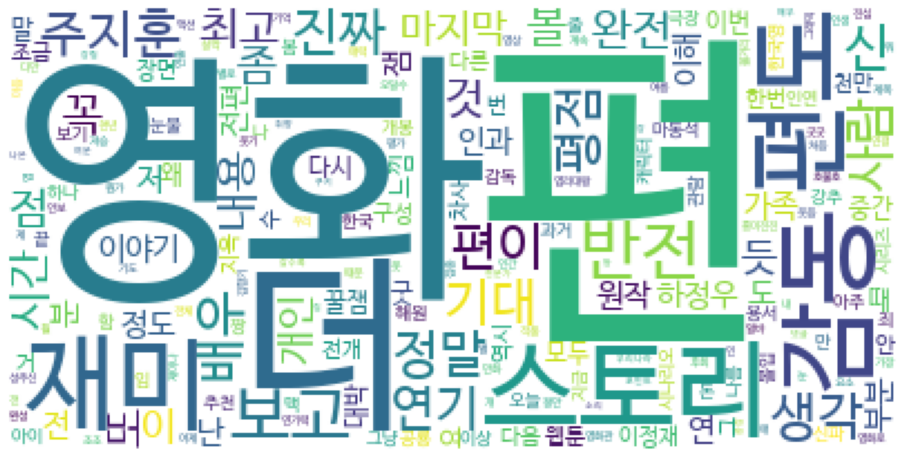

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

In [95]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 부정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in neg_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(1000)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


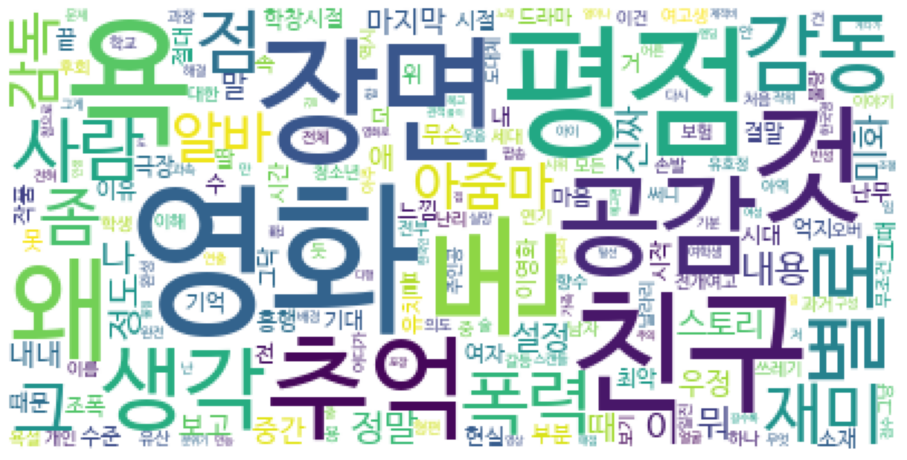

In [96]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

# **[국제시장 감독 - 윤제균]**
feat. 공조

In [147]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait   
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver', options=options)

movie_id = '97399'
URL = 'https://movie.daum.net/moviedb/grade?movieId=' + movie_id

browser.get(URL)

try:   
    review = WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )    

except TimeoutException:    
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

review = browser.find_element_by_class_name('desc_txt')

review.text


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


'김주혁 그립습니다.'

*첫번째 리뷰의 영화 평점 (별점) 

In [148]:
first_score = browser.find_element_by_class_name('ratings')
first_score.text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


'10'

*한 페이지의 모든 리뷰 가져오기

In [149]:
reviews = browser.find_elements_by_class_name('desc_txt')
scores = browser.find_elements_by_class_name('ratings')

for review in reviews:
  print('>>', review.text.replace('\n', ' '))

for score in scores:
  print(score.text, end='점, ')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


>> 김주혁 그립습니다.
>> 두번째 보았는데  현빈인줄은  몰랐네요 잘 생기기도 했지만  연기를 참 잘하는 배우.. 목소리도 매력있고  키도 훤출  흠 잡을 것이 없네요
>> 1988년에 개봉한 레드히트 그대로 표절한 개 쓰레기영화;; 감독은 얼마나 능지가 딸리길래 시나리오 쓸 능력도 없어서 옛날영화 그대로 베껴오냐;; 
>> 많은 관객이 볼만하다... 허리우드식 냄새가 나기는 해도 이제 우리 영화도 수준이 예전 같지 않다~~^^*
>> 나는 윤아양이 좋아용♡
>> 개연성 1도 없음
>> 방금 넷플릭스에서 보고 왔는데 이게 어떻게 7백만이 됐지? 이해가 안 가네. 
>> 유해진의 가볍게 웃을만한 연기, 현빈의 멋있는 액션, 故김주혁의 카리스마, 윤아의 푼수 연기는 좋았다만은 정작 각본이나 영상은 창작이 없다고 느낄뿐더러 재미는 더럽게 없고 해외영화를 표절했다는 느낌이 더욱 강하다.
>> 김주혁을 또 생각나게 하는 작품. 여기서 현빈이 북한 말 배웠구만 기래~~~^^
>> 이건 현빈 액션콤보가  화제였다!^^
10점, 10점, 1점, 7점, 10점, 3점, 4점, 0점, 8점, 8점, 

In [150]:
#리뷰의 수와 별점의 수가 동일한지 확인하기

print('\n영화 리뷰 수 : ', len(reviews), '\n영화 별점 수 : ', len(scores))


영화 리뷰 수 :  10 
영화 별점 수 :  10


In [151]:
# 리뷰 관련 모든 정보를 가져온다.
review_elems = browser.find_elements_by_class_name('cmt_info')

ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트


try:    
    review = WebDriverWait(browser, 20).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )   

except TimeoutException:  
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

# 영화 리뷰 관련 모든 정보를 가져와서 리스트에 담는다.
for review_elem in review_elems:
  
  ratings.append(review_elem.find_element_by_class_name('ratings').text)
  try:
    comments.append(review_elem.find_element_by_class_name('desc_txt').text.replace('\n', ' '))
  except NoSuchElementException:
    comments.append('')

for i, score in enumerate(ratings):
  print(f'{score}점, 리뷰: {comments[i]}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


10점, 리뷰: 김주혁 그립습니다.
10점, 리뷰: 두번째 보았는데  현빈인줄은  몰랐네요 잘 생기기도 했지만  연기를 참 잘하는 배우.. 목소리도 매력있고  키도 훤출  흠 잡을 것이 없네요
1점, 리뷰: 1988년에 개봉한 레드히트 그대로 표절한 개 쓰레기영화;; 감독은 얼마나 능지가 딸리길래 시나리오 쓸 능력도 없어서 옛날영화 그대로 베껴오냐;; 
7점, 리뷰: 많은 관객이 볼만하다... 허리우드식 냄새가 나기는 해도 이제 우리 영화도 수준이 예전 같지 않다~~^^*
10점, 리뷰: 나는 윤아양이 좋아용♡
3점, 리뷰: 개연성 1도 없음
4점, 리뷰: 방금 넷플릭스에서 보고 왔는데 이게 어떻게 7백만이 됐지? 이해가 안 가네. 
0점, 리뷰: 유해진의 가볍게 웃을만한 연기, 현빈의 멋있는 액션, 故김주혁의 카리스마, 윤아의 푼수 연기는 좋았다만은 정작 각본이나 영상은 창작이 없다고 느낄뿐더러 재미는 더럽게 없고 해외영화를 표절했다는 느낌이 더욱 강하다.
8점, 리뷰: 김주혁을 또 생각나게 하는 작품. 여기서 현빈이 북한 말 배웠구만 기래~~~^^
8점, 리뷰: 이건 현빈 액션콤보가  화제였다!^^


* [시각화] 스코어의 점수를 별의 갯수로 표현해보기

In [152]:
for i, score in enumerate(ratings):
    for j in range(int(int(score)/2)) :
        print('★', end = ' ')
    print(f' - {comments[i]}')
    print('')

★ ★ ★ ★ ★  - 김주혁 그립습니다.

★ ★ ★ ★ ★  - 두번째 보았는데  현빈인줄은  몰랐네요 잘 생기기도 했지만  연기를 참 잘하는 배우.. 목소리도 매력있고  키도 훤출  흠 잡을 것이 없네요

 - 1988년에 개봉한 레드히트 그대로 표절한 개 쓰레기영화;; 감독은 얼마나 능지가 딸리길래 시나리오 쓸 능력도 없어서 옛날영화 그대로 베껴오냐;; 

★ ★ ★  - 많은 관객이 볼만하다... 허리우드식 냄새가 나기는 해도 이제 우리 영화도 수준이 예전 같지 않다~~^^*

★ ★ ★ ★ ★  - 나는 윤아양이 좋아용♡

★  - 개연성 1도 없음

★ ★  - 방금 넷플릭스에서 보고 왔는데 이게 어떻게 7백만이 됐지? 이해가 안 가네. 

 - 유해진의 가볍게 웃을만한 연기, 현빈의 멋있는 액션, 故김주혁의 카리스마, 윤아의 푼수 연기는 좋았다만은 정작 각본이나 영상은 창작이 없다고 느낄뿐더러 재미는 더럽게 없고 해외영화를 표절했다는 느낌이 더욱 강하다.

★ ★ ★ ★  - 김주혁을 또 생각나게 하는 작품. 여기서 현빈이 북한 말 배웠구만 기래~~~^^

★ ★ ★ ★  - 이건 현빈 액션콤보가  화제였다!^^



* 평점 더보기 버튼을 자동으로 눌러 모든 리뷰&별점 가져오기

In [153]:
print('Unfolding movie review pages:')
click = 0  
print('Counting pages...')

XPATH = '''//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'''
while True:
  try: 
    WebDriverWait(browser, 10).until(EC.presence_of_element_located(
      (By.XPATH, XPATH))).click()
      
    click += 1
    print(click) if click % 20 == 0 else print(click, end='|')
  except TimeoutException: 
    print('Done!')
    break

Unfolding movie review pages:
Counting pages...
1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20
21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36|37|38|39|40
41|42|43|44|45|46|47|48|49|50|51|52|53|54|55|56|57|58|59|60
61|62|63|64|65|66|67|68|69|70|71|72|73|74|75|76|77|78|79|80
81|82|83|84|85|86|87|88|89|90|91|92|93|94|95|96|97|98|99|100
101|102|103|104|105|106|107|108|109|110|111|112|113|114|115|116|117|118|119|120
121|122|123|124|125|126|127|128|129|130|131|132|133|134|135|136|137|138|139|140
141|142|143|144|145|146|147|148|149|150|151|152|153|154|155|156|157|158|159|160
161|162|163|164|165|166|167|168|169|170|171|172|173|174|175|176|177|178|179|180
181|182|183|184|185|Done!


In [154]:
ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트

print('Extracting movie reviews...')
review_elems = browser.find_elements_by_class_name('cmt_info')
for review_elem in review_elems:

  ratings.append(review_elem.find_element(By.CLASS_NAME, 'ratings').text)
  try:
    comments.append(review_elem.find_element(By.CLASS_NAME, 
                        'desc_txt').text.replace('\n', ' '))
  except:
    comments.append('')
else:
  print('\n--- Job completed!', 
        f'총 {len(review_elems):,}개의 리뷰 데이터를 수집했습니다.', 
        '-' * 11, '\n') 

Extracting movie reviews...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """



--- Job completed! 총 5,558개의 리뷰 데이터를 수집했습니다. ----------- 



In [155]:
print(f'총 리뷰 개수.......: {len(comments):,}개')
print(f'총 리뷰 평점 개수...: {len(ratings):,}개')

for i, score in enumerate(ratings[:10]):
  print(f'{score} - {comments[i]}')

filename_reviews = 'movie-reviews.txt'

with open(filename_reviews, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
    file.write(score + '|')           
    file.write(comments[i] + '\n')  
      
print(f"수집한 데이터를 '{filename_reviews}'로 저장하였습니다.")

from google.colab import files
files.download('movie-reviews.txt')

총 리뷰 개수.......: 5,558개
총 리뷰 평점 개수...: 5,558개
10 - 김주혁 그립습니다.
10 - 두번째 보았는데  현빈인줄은  몰랐네요 잘 생기기도 했지만  연기를 참 잘하는 배우.. 목소리도 매력있고  키도 훤출  흠 잡을 것이 없네요
1 - 1988년에 개봉한 레드히트 그대로 표절한 개 쓰레기영화;; 감독은 얼마나 능지가 딸리길래 시나리오 쓸 능력도 없어서 옛날영화 그대로 베껴오냐;; 
7 - 많은 관객이 볼만하다... 허리우드식 냄새가 나기는 해도 이제 우리 영화도 수준이 예전 같지 않다~~^^*
10 - 나는 윤아양이 좋아용♡
3 - 개연성 1도 없음
4 - 방금 넷플릭스에서 보고 왔는데 이게 어떻게 7백만이 됐지? 이해가 안 가네. 
0 - 유해진의 가볍게 웃을만한 연기, 현빈의 멋있는 액션, 故김주혁의 카리스마, 윤아의 푼수 연기는 좋았다만은 정작 각본이나 영상은 창작이 없다고 느낄뿐더러 재미는 더럽게 없고 해외영화를 표절했다는 느낌이 더욱 강하다.
8 - 김주혁을 또 생각나게 하는 작품. 여기서 현빈이 북한 말 배웠구만 기래~~~^^
8 - 이건 현빈 액션콤보가  화제였다!^^
수집한 데이터를 'movie-reviews.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*수집한 모든 데이터들 - 긍정 v.s 부정 코멘트로 분류하기

In [156]:
pos_comments = []  # 긍정 리뷰들
neg_comments = []  # 부정 리뷰들

filename = 'movie-reviews-senti.txt'  
with open(filename, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
   
    grade = int(score)
    if 5 < grade < 9: continue            # 평점이 6~8인 리뷰는 제외

    if len(comments[i]) < 4: continue     # 내용이 너무 짧은 리뷰는 제외

    if grade >= 9:                        # 긍정 리뷰면 '1'이라는 라벨 부여
      label = '1 '                         
      pos_comments.append(comments[i])    # 긍정 리뷰를 긍정 리뷰 리스트에 추가한다.

    else:                                 # 부정 리뷰면 '0'이라는 라벨 부여
      label = '0 '                        
      neg_comments.append(comments[i])    # 부정 리뷰를 부정 리뷰 리스트에 추가한다.            
    
    file.write(label + '| ')               # 긍정 또는 부정 라벨을 텍스트 파일로 쓴 후 각 리뷰를 줄 단위로 텍스트 파일에 쓴다.
    file.write(comments[i] + '\n')        
  else:
    print(f'긍정 리뷰 개수: {len(pos_comments):,}개\n부정 리뷰 개수: {len(neg_comments):,}개')

print(f"분류한 데이터를 '{filename}'로 저장하였습니다.")

from google.colab import files
files.download(filename)

print(f'긍정 리뷰...: {len(pos_comments):,}개')
for review in pos_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')

print(f'부정 리뷰...: {len(neg_comments):,}개')
for review in neg_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')


print(f'리뷰 총계...: {len(pos_comments) + len(neg_comments):,}개')

긍정 리뷰 개수: 964개
부정 리뷰 개수: 414개
분류한 데이터를 'movie-reviews-senti.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

긍정 리뷰...: 964개
	 김주혁 그립습니다.
	 두번째 보았는데  현빈인줄은  몰랐네요 잘 생기기도 했지만  연기를 참 잘하는 배우.. 목소리도 매력있고  키도 훤출  흠 잡을 것이 없네요
	 나는 윤아양이 좋아용♡
	 재밌네요!
	 현빈 유해진 케미가좋네요
	 몇번 봐도 잼있어요
	 잼있구만
	 적절한 코미디가 웃겨요
	 빈님 이렇게 엑션도 잘했나? 세번봤는데..또 보고싶네.
	 현빈과 액션만 해도 충분! 스토리도 끊임없이 긴장감 있고좋네요~
	 ...

부정 리뷰...: 414개
	 1988년에 개봉한 레드히트 그대로 표절한 개 쓰레기영화;; 감독은 얼마나 능지가 딸리길래 시나리오 쓸 능력도 없어서 옛날영화 그대로 베껴오냐;; 
	 개연성 1도 없음
	 방금 넷플릭스에서 보고 왔는데 이게 어떻게 7백만이 됐지? 이해가 안 가네. 
	 유해진의 가볍게 웃을만한 연기, 현빈의 멋있는 액션, 故김주혁의 카리스마, 윤아의 푼수 연기는 좋았다만은 정작 각본이나 영상은 창작이 없다고 느낄뿐더러 재미는 더럽게 없고 해외영화를 표절했다는 느낌이 더욱 강하다.
	 전형적인 한국 영화 패턴. 어설픈 개그, 개연성 없는 추리 방식, 이상한 퍼즐 같은 스토리...
	 이딴걸 영화라고 개연성 1도 없는걸 진짜 제작자가 이딴 시나리오보고 콜 했다는게 놀랍다
	 현빈이 멋있고 연기도 잘함.. 재미없음
	 현빈의 액션....간지쩔긴 하는데 분량 부족......윤아의 짱귀여움..... 그것 말곤 없다... 시사회 팬 미팅때 윤아야 다리가 못 나도 너무 못 났다.....뼈만 앙상한데 엄청나게 휘기까지.......
	 현빈 유해진 김주혁 장영남 데리고 모하는곤지..
	 개연성 지로..
	 ...

리뷰 총계...: 1,378개


*워드 클라우드로 영화 리뷰 시각화하기

In [157]:
!python -m pip install konlpy
import konlpy 
print('KoNLPy version...:', konlpy.__version__)

KoNLPy version...: 0.5.2


In [158]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 긍정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in pos_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(1000)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


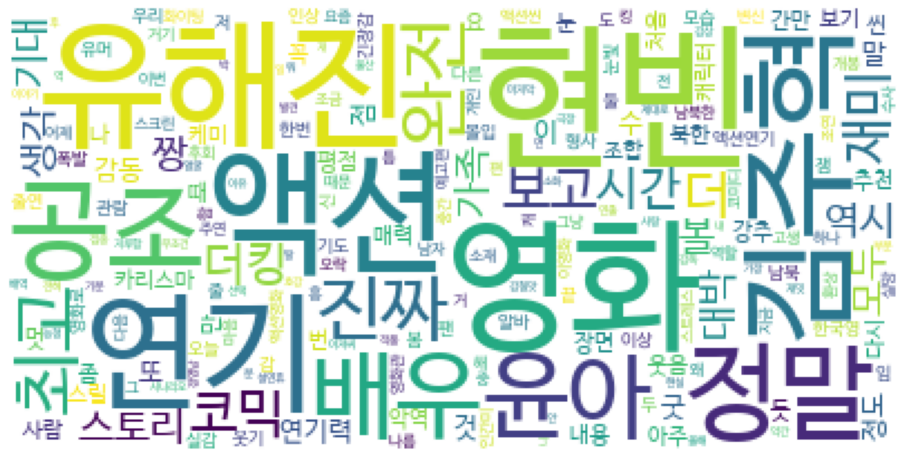

In [159]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

In [162]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 부정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in neg_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(100)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


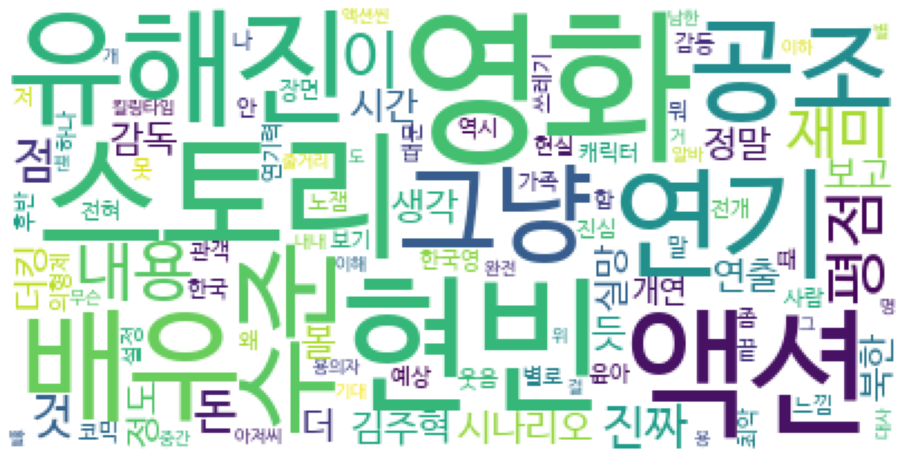

In [163]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

# **[극한직업 감독 - 윤제균]**
feat. 써니

In [71]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait   
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver', options=options)

movie_id = '57884'
URL = 'https://movie.daum.net/moviedb/grade?movieId=' + movie_id

browser.get(URL)

try:   
    review = WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )    

except TimeoutException:    
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

review = browser.find_element_by_class_name('desc_txt')

review.text


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


'인생영화로 꼽는 영화중 한편\n꼭 보시길 바랍니다\n감동도 재미도 다 있는 영화\n강추'

*첫번째 리뷰의 영화 평점 (별점) 

In [72]:
first_score = browser.find_element_by_class_name('ratings')
first_score.text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


'10'

*한 페이지의 모든 리뷰 가져오기

In [73]:
reviews = browser.find_elements_by_class_name('desc_txt')
scores = browser.find_elements_by_class_name('ratings')

for review in reviews:
  print('>>', review.text.replace('\n', ' '))

for score in scores:
  print(score.text, end='점, ')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


>> 인생영화로 꼽는 영화중 한편 꼭 보시길 바랍니다 감동도 재미도 다 있는 영화 강추
>> 진짜 머랄까 스토리가 루즈하지도 않고 감동도 있고 재미도 있고 내가 본 한국 영화 중 역대급인듯
>> 찐으로 내 인생 영화....
>> 초딩에서 갓 중딩으로 발전한 저지만..재밋씁니다!
>> 천우희의 명품연기의 발견..
>> 다시보니 더 재밌네요
>> 대단한 영화~~!!!
>> 남자이지만 볼 때마다 공감된다  어릴 적 느낄 수 없던 추억이지만 볼 때마다 눈물이 나는 이유는 무엇일까...
>> 지금 40대 후반의 남자. 죽은 사랑 세포를 살리는 배경음악과 그리운 학창시절.....
>> 보구싶다,친구야~~~~~~~~
10점, 10점, 10점, 10점, 8점, 10점, 10점, 10점, 10점, 10점, 

In [74]:
#리뷰의 수와 별점의 수가 동일한지 확인하기

print('\n영화 리뷰 수 : ', len(reviews), '\n영화 별점 수 : ', len(scores))


영화 리뷰 수 :  10 
영화 별점 수 :  10


In [75]:
# 리뷰 관련 모든 정보를 가져온다.
review_elems = browser.find_elements_by_class_name('cmt_info')

ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트


try:    
    review = WebDriverWait(browser, 20).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )   

except TimeoutException:  
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

# 영화 리뷰 관련 모든 정보를 가져와서 리스트에 담는다.
for review_elem in review_elems:
  
  ratings.append(review_elem.find_element_by_class_name('ratings').text)
  try:
    comments.append(review_elem.find_element_by_class_name('desc_txt').text.replace('\n', ' '))
  except NoSuchElementException:
    comments.append('')

for i, score in enumerate(ratings):
  print(f'{score}점, 리뷰: {comments[i]}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


10점, 리뷰: 인생영화로 꼽는 영화중 한편 꼭 보시길 바랍니다 감동도 재미도 다 있는 영화 강추
10점, 리뷰: 진짜 머랄까 스토리가 루즈하지도 않고 감동도 있고 재미도 있고 내가 본 한국 영화 중 역대급인듯
10점, 리뷰: 찐으로 내 인생 영화....
10점, 리뷰: 초딩에서 갓 중딩으로 발전한 저지만..재밋씁니다!
8점, 리뷰: 천우희의 명품연기의 발견..
10점, 리뷰: 다시보니 더 재밌네요
10점, 리뷰: 대단한 영화~~!!!
10점, 리뷰: 남자이지만 볼 때마다 공감된다  어릴 적 느낄 수 없던 추억이지만 볼 때마다 눈물이 나는 이유는 무엇일까...
10점, 리뷰: 지금 40대 후반의 남자. 죽은 사랑 세포를 살리는 배경음악과 그리운 학창시절.....
10점, 리뷰: 보구싶다,친구야~~~~~~~~


* [시각화] 스코어의 점수를 별의 갯수로 표현해보기

In [76]:
for i, score in enumerate(ratings):
    for j in range(int(int(score)/2)) :
        print('★', end = ' ')
    print(f' - {comments[i]}')
    print('')

★ ★ ★ ★ ★  - 인생영화로 꼽는 영화중 한편 꼭 보시길 바랍니다 감동도 재미도 다 있는 영화 강추

★ ★ ★ ★ ★  - 진짜 머랄까 스토리가 루즈하지도 않고 감동도 있고 재미도 있고 내가 본 한국 영화 중 역대급인듯

★ ★ ★ ★ ★  - 찐으로 내 인생 영화....

★ ★ ★ ★ ★  - 초딩에서 갓 중딩으로 발전한 저지만..재밋씁니다!

★ ★ ★ ★  - 천우희의 명품연기의 발견..

★ ★ ★ ★ ★  - 다시보니 더 재밌네요

★ ★ ★ ★ ★  - 대단한 영화~~!!!

★ ★ ★ ★ ★  - 남자이지만 볼 때마다 공감된다  어릴 적 느낄 수 없던 추억이지만 볼 때마다 눈물이 나는 이유는 무엇일까...

★ ★ ★ ★ ★  - 지금 40대 후반의 남자. 죽은 사랑 세포를 살리는 배경음악과 그리운 학창시절.....

★ ★ ★ ★ ★  - 보구싶다,친구야~~~~~~~~



* 평점 더보기 버튼을 자동으로 눌러 모든 리뷰&별점 가져오기

In [ ]:
print('Unfolding movie review pages:')
click = 0  
print('Counting pages...')

XPATH = '''//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'''
while True:
  try: 
    WebDriverWait(browser, 10).until(EC.presence_of_element_located(
      (By.XPATH, XPATH))).click()
      
    click += 1
    print(click) if click % 20 == 0 else print(click, end='|')
  except TimeoutException: 
    print('Done!')
    break

Unfolding movie review pages:
Counting pages...
1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20
21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36|37|38|39|40
41|42|43|44|45|46|47|48|49|50|51|52|53|54|55|56|57|58|59|60
61|62|63|64|65|66|67|68|69|70|71|72|73|74|75|76|77|78|79|80
81|82|83|84|85|86|87|88|89|90|91|92|93|94|95|96|97|98|99|100
101|102|103|104|105|106|107|108|

In [78]:
ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트

print('Extracting movie reviews...')
review_elems = browser.find_elements_by_class_name('cmt_info')
for review_elem in review_elems:

  ratings.append(review_elem.find_element(By.CLASS_NAME, 'ratings').text)
  try:
    comments.append(review_elem.find_element(By.CLASS_NAME, 
                        'desc_txt').text.replace('\n', ' '))
  except:
    comments.append('')
else:
  print('\n--- Job completed!', 
        f'총 {len(review_elems):,}개의 리뷰 데이터를 수집했습니다.', 
        '-' * 11, '\n') 

Extracting movie reviews...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """



--- Job completed! 총 4,348개의 리뷰 데이터를 수집했습니다. ----------- 



In [79]:
print(f'총 리뷰 개수.......: {len(comments):,}개')
print(f'총 리뷰 평점 개수...: {len(ratings):,}개')

for i, score in enumerate(ratings[:10]):
  print(f'{score} - {comments[i]}')

filename_reviews = 'movie-reviews.txt'

with open(filename_reviews, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
    file.write(score + '|')           
    file.write(comments[i] + '\n')  
      
print(f"수집한 데이터를 '{filename_reviews}'로 저장하였습니다.")

from google.colab import files
files.download('movie-reviews.txt')

총 리뷰 개수.......: 4,348개
총 리뷰 평점 개수...: 4,348개
10 - 인생영화로 꼽는 영화중 한편 꼭 보시길 바랍니다 감동도 재미도 다 있는 영화 강추
10 - 진짜 머랄까 스토리가 루즈하지도 않고 감동도 있고 재미도 있고 내가 본 한국 영화 중 역대급인듯
10 - 찐으로 내 인생 영화....
10 - 초딩에서 갓 중딩으로 발전한 저지만..재밋씁니다!
8 - 천우희의 명품연기의 발견..
10 - 다시보니 더 재밌네요
10 - 대단한 영화~~!!!
10 - 남자이지만 볼 때마다 공감된다  어릴 적 느낄 수 없던 추억이지만 볼 때마다 눈물이 나는 이유는 무엇일까...
10 - 지금 40대 후반의 남자. 죽은 사랑 세포를 살리는 배경음악과 그리운 학창시절.....
10 - 보구싶다,친구야~~~~~~~~
수집한 데이터를 'movie-reviews.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*수집한 모든 데이터들 - 긍정 v.s 부정 코멘트로 분류하기

In [80]:
pos_comments = []  # 긍정 리뷰들
neg_comments = []  # 부정 리뷰들

filename = 'movie-reviews-senti.txt'  
with open(filename, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
   
    grade = int(score)
    if 5 < grade < 9: continue            # 평점이 6~8인 리뷰는 제외

    if len(comments[i]) < 4: continue     # 내용이 너무 짧은 리뷰는 제외

    if grade >= 9:                        # 긍정 리뷰면 '1'이라는 라벨 부여
      label = '1 '                         
      pos_comments.append(comments[i])    # 긍정 리뷰를 긍정 리뷰 리스트에 추가한다.

    else:                                 # 부정 리뷰면 '0'이라는 라벨 부여
      label = '0 '                        
      neg_comments.append(comments[i])    # 부정 리뷰를 부정 리뷰 리스트에 추가한다.            
    
    file.write(label + '| ')               # 긍정 또는 부정 라벨을 텍스트 파일로 쓴 후 각 리뷰를 줄 단위로 텍스트 파일에 쓴다.
    file.write(comments[i] + '\n')        
  else:
    print(f'긍정 리뷰 개수: {len(pos_comments):,}개\n부정 리뷰 개수: {len(neg_comments):,}개')

print(f"분류한 데이터를 '{filename}'로 저장하였습니다.")

from google.colab import files
files.download(filename)

print(f'긍정 리뷰...: {len(pos_comments):,}개')
for review in pos_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')

print(f'부정 리뷰...: {len(neg_comments):,}개')
for review in neg_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')


print(f'리뷰 총계...: {len(pos_comments) + len(neg_comments):,}개')

긍정 리뷰 개수: 3,101개
부정 리뷰 개수: 194개
분류한 데이터를 'movie-reviews-senti.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

긍정 리뷰...: 3,101개
	 인생영화로 꼽는 영화중 한편 꼭 보시길 바랍니다 감동도 재미도 다 있는 영화 강추
	 진짜 머랄까 스토리가 루즈하지도 않고 감동도 있고 재미도 있고 내가 본 한국 영화 중 역대급인듯
	 찐으로 내 인생 영화....
	 초딩에서 갓 중딩으로 발전한 저지만..재밋씁니다!
	 다시보니 더 재밌네요
	 대단한 영화~~!!!
	 남자이지만 볼 때마다 공감된다  어릴 적 느낄 수 없던 추억이지만 볼 때마다 눈물이 나는 이유는 무엇일까...
	 지금 40대 후반의 남자. 죽은 사랑 세포를 살리는 배경음악과 그리운 학창시절.....
	 보구싶다,친구야~~~~~~~~
	 내게도 저런 시절이 이었다는걸  잊고살았는데 보는 내내 내이야기같은 영화 가슴 사아한 영화 그시젉 우리들 이야기,,덧없이 세월이 갔구나 ㅠㅠ
	 ...

부정 리뷰...: 194개
	 추억과 우정이 돈이 된다니.
	 욕은 많이해도 재밌다.
	 복고영화라서 세련되지 못했다기보다는...
	 재미는있지만개인적으로날라리들미화한것같아서별로네요
	 욕설 난무에 물질만능주의적인 막장엔딩에 민주화 운동은 왜 그 따위로 희화화하고 난리냐ㅉㅉ 이딴 저질영화가 평점이 높다니 수준 낮은 관객들 엄청 많구나ㅉㅉㅉㅉ
	 재미있는데 평점 9점때는 아니다
	 늙다리들 죽으려면 곱게 죽든지...
	 이런 영화가 재밌다고? 쓰레기 영화!!!
	 좀 오버스러운데
	 애들 볼까 두렵다 한때 학창시절 어리다는 이유 많으로 양아치년들의 과거 불량행위까지 미화시키는 영상들 탈선이 무슨 추억인양 그 탈선에 파생되는 희생자들이 얼마나 많았을지 곰곰히 생각해 보아야한다 이영화의 논리라면 왕따도 추억이고 학창시절 미친짓들이 추억이라고 주장하지만 그속에 단지 어리다는 이유로 
	 ...

리뷰 총계...: 3,295개


*워드 클라우드로 영화 리뷰 시각화하기

In [81]:
!python -m pip install konlpy
import konlpy 
print('KoNLPy version...:', konlpy.__version__)

KoNLPy version...: 0.5.2


In [89]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 긍정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in pos_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(1000)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


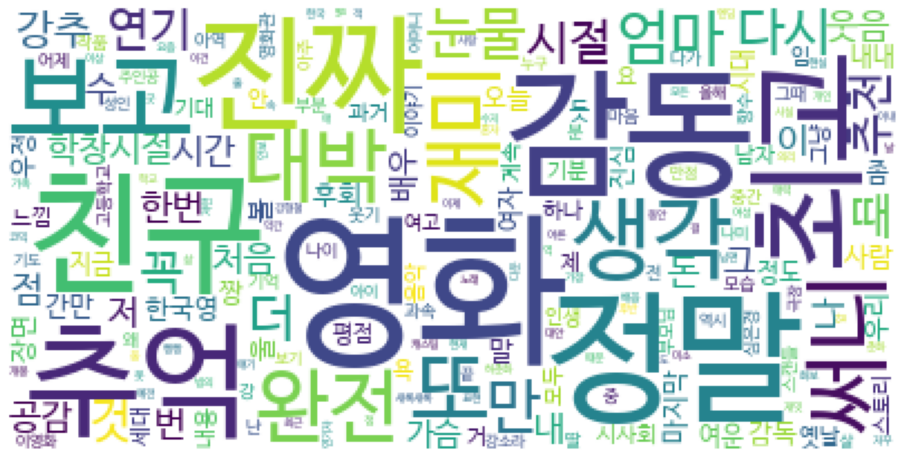

In [90]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

In [105]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 부정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in neg_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(80)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


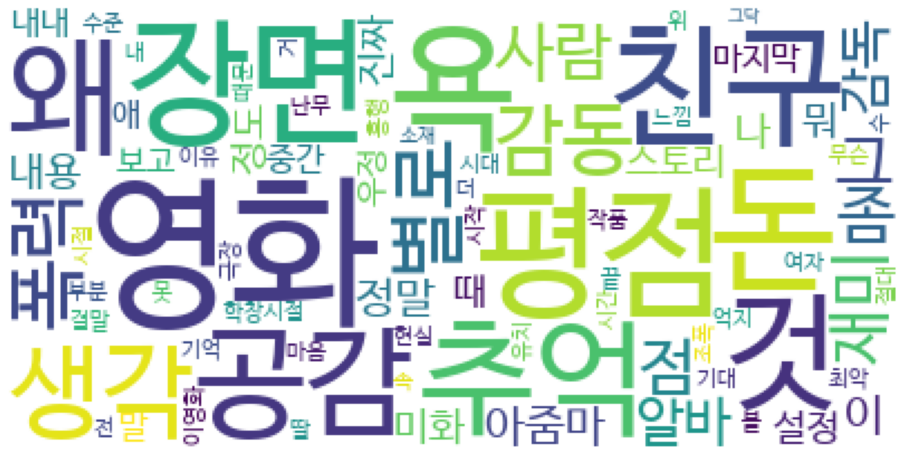

In [106]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

# **[어벤져스 -엔드게임 감독 - 안소니 루소]**
feat.어벤져스-인피니티 워

In [118]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait   
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver', options=options)

movie_id = '93251'
URL = 'https://movie.daum.net/moviedb/grade?movieId=' + movie_id

browser.get(URL)

try:   
    review = WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )    

except TimeoutException:    
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

review = browser.find_element_by_class_name('desc_txt')

review.text


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


'사실상 스타로드도 굉장히 불쌍한 캐릭이다.어렸을때 아버지는 거의 못 보고 어머니를 떠나보내고, 라바져들에게 납치당해서 좀도둑으로 키워졌다가 이제 드디어 진짜 아빠를 만났다 싶었을때 아빠가 엄마를 고의적으로 죽였다는 사실을 알고 충격을 먹다가 친아빠 대신 자신의 이익으로 키웠지만, 잘 보살펴 주고 희생까지 한 욘두도 떠나보냈다. 그리고 친아빠도 죽고 이제 의지할 유일한 것은 그의 여친 가모라 뿐이었다. 그러다 마지막 버팀목이었던 여친가모라도 타노스에게 살해당하자 분노를 느껴 방아쇠를 당기지도 않고 이성을 잃어버린 거다.\n결론:스타로드 짱'

* 첫번째 영화 리뷰 평점(별점)

In [119]:
first_score = browser.find_element_by_class_name('ratings')
first_score.text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


'10'

* 첫 번째 페이지 모든 리뷰 가져오기

In [120]:
reviews = browser.find_elements_by_class_name('desc_txt')
scores = browser.find_elements_by_class_name('ratings')

for review in reviews:
  print('>>', review.text.replace('\n', ' '))

for score in scores:
  print(score.text, end='점, ')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


>> 사실상 스타로드도 굉장히 불쌍한 캐릭이다.어렸을때 아버지는 거의 못 보고 어머니를 떠나보내고, 라바져들에게 납치당해서 좀도둑으로 키워졌다가 이제 드디어 진짜 아빠를 만났다 싶었을때 아빠가 엄마를 고의적으로 죽였다는 사실을 알고 충격을 먹다가 친아빠 대신 자신의 이익으로 키웠지만, 잘 보살펴 주고 희생까지 한 욘두도 떠나보냈다. 그리고 친아빠도 죽고 이제 의지할 유일한 것은 그의 여친 가모라 뿐이었다. 그러다 마지막 버팀목이었던 여친가모라도 타노스에게 살해당하자 분노를 느껴 방아쇠를 당기지도 않고 이성을 잃어버린 거다. 결론:스타로드 짱
>> 얼씨구? 이 새끼들 내가 폴러드랑 제레미 레너는 출연하지도 않는데 여기 영화정보 사이트 올리는 희대의 개뻘짓으로 사기를 친 걸 까발리니까 찔려서 평점 삭제하는 것 좀 봐라?? 비열하고 뻔뻔스럽기 짝이없군!  
>> 어벤져스의 가장 큰 문제점은 밸런스가 너무 안맞는다는 것. 그리고 인피니티 스톤 갖고 있으면, 구성원 절반 날리기 전에 자원문제는 해결하고도 남겠다.
>> 재탕영화 지루극치
>> 기대하고 결제 약간 실망했어요~ㅠㅠ
>> 약간 허무하다...
>> 역시나 기존 어벤져스 멤버들은 쓸데없이 인상이나 쓰며 재미를 떨어뜨린다. 반면 닥터 스트레인지와 가오갤의 유쾌함이 영화를 살렸다.
>> 기대만큼 실망도크네요 임펙트도없고  내용도 그닥 너무억지
>> 이게 영화냐? 볼게벖으니 본거지  털거지들 다나외서 정신없이   재미도 없구 한창졸았음  정말지루함. 여기10점  알바들은 양심을 속이는거임
>> 지루 구질구질 미국이세계를구함
10점, 3점, 5점, 0점, 3점, 9점, 6점, 5점, 1점, 5점, 

In [121]:
# 리뷰의 수와 별점의 수가 동일한 지 확인하기

print('\n영화 리뷰 수 : ', len(reviews), '\n영화 별점 수 : ', len(scores))


영화 리뷰 수 :  10 
영화 별점 수 :  10


In [122]:
# 리뷰 관련 모든 정보를 가져온다.
review_elems = browser.find_elements_by_class_name('cmt_info')

ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트


try:    
    review = WebDriverWait(browser, 20).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )   

except TimeoutException:  
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

# 영화 리뷰 관련 모든 정보를 가져와서 리스트에 담는다.
for review_elem in review_elems:
  
  ratings.append(review_elem.find_element_by_class_name('ratings').text)
  try:
    comments.append(review_elem.find_element_by_class_name('desc_txt').text.replace('\n', ' '))
  except NoSuchElementException:
    comments.append('')

for i, score in enumerate(ratings):
  print(f'{score}점, 리뷰: {comments[i]}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


10점, 리뷰: 사실상 스타로드도 굉장히 불쌍한 캐릭이다.어렸을때 아버지는 거의 못 보고 어머니를 떠나보내고, 라바져들에게 납치당해서 좀도둑으로 키워졌다가 이제 드디어 진짜 아빠를 만났다 싶었을때 아빠가 엄마를 고의적으로 죽였다는 사실을 알고 충격을 먹다가 친아빠 대신 자신의 이익으로 키웠지만, 잘 보살펴 주고 희생까지 한 욘두도 떠나보냈다. 그리고 친아빠도 죽고 이제 의지할 유일한 것은 그의 여친 가모라 뿐이었다. 그러다 마지막 버팀목이었던 여친가모라도 타노스에게 살해당하자 분노를 느껴 방아쇠를 당기지도 않고 이성을 잃어버린 거다. 결론:스타로드 짱
3점, 리뷰: 얼씨구? 이 새끼들 내가 폴러드랑 제레미 레너는 출연하지도 않는데 여기 영화정보 사이트 올리는 희대의 개뻘짓으로 사기를 친 걸 까발리니까 찔려서 평점 삭제하는 것 좀 봐라?? 비열하고 뻔뻔스럽기 짝이없군!  
5점, 리뷰: 어벤져스의 가장 큰 문제점은 밸런스가 너무 안맞는다는 것. 그리고 인피니티 스톤 갖고 있으면, 구성원 절반 날리기 전에 자원문제는 해결하고도 남겠다.
0점, 리뷰: 재탕영화 지루극치
3점, 리뷰: 기대하고 결제 약간 실망했어요~ㅠㅠ
9점, 리뷰: 약간 허무하다...
6점, 리뷰: 역시나 기존 어벤져스 멤버들은 쓸데없이 인상이나 쓰며 재미를 떨어뜨린다. 반면 닥터 스트레인지와 가오갤의 유쾌함이 영화를 살렸다.
5점, 리뷰: 기대만큼 실망도크네요 임펙트도없고  내용도 그닥 너무억지
1점, 리뷰: 이게 영화냐? 볼게벖으니 본거지  털거지들 다나외서 정신없이   재미도 없구 한창졸았음  정말지루함. 여기10점  알바들은 양심을 속이는거임
5점, 리뷰: 지루 구질구질 미국이세계를구함


* [시각화] 스코어의 점수를 별의 갯수로 표현해보기

In [123]:
for i, score in enumerate(ratings):
    for j in range(int(int(score)/2)) :
        print('★', end = ' ')
    print(f' - {comments[i]}')
    print('')

★ ★ ★ ★ ★  - 사실상 스타로드도 굉장히 불쌍한 캐릭이다.어렸을때 아버지는 거의 못 보고 어머니를 떠나보내고, 라바져들에게 납치당해서 좀도둑으로 키워졌다가 이제 드디어 진짜 아빠를 만났다 싶었을때 아빠가 엄마를 고의적으로 죽였다는 사실을 알고 충격을 먹다가 친아빠 대신 자신의 이익으로 키웠지만, 잘 보살펴 주고 희생까지 한 욘두도 떠나보냈다. 그리고 친아빠도 죽고 이제 의지할 유일한 것은 그의 여친 가모라 뿐이었다. 그러다 마지막 버팀목이었던 여친가모라도 타노스에게 살해당하자 분노를 느껴 방아쇠를 당기지도 않고 이성을 잃어버린 거다. 결론:스타로드 짱

★  - 얼씨구? 이 새끼들 내가 폴러드랑 제레미 레너는 출연하지도 않는데 여기 영화정보 사이트 올리는 희대의 개뻘짓으로 사기를 친 걸 까발리니까 찔려서 평점 삭제하는 것 좀 봐라?? 비열하고 뻔뻔스럽기 짝이없군!  

★ ★  - 어벤져스의 가장 큰 문제점은 밸런스가 너무 안맞는다는 것. 그리고 인피니티 스톤 갖고 있으면, 구성원 절반 날리기 전에 자원문제는 해결하고도 남겠다.

 - 재탕영화 지루극치

★  - 기대하고 결제 약간 실망했어요~ㅠㅠ

★ ★ ★ ★  - 약간 허무하다...

★ ★ ★  - 역시나 기존 어벤져스 멤버들은 쓸데없이 인상이나 쓰며 재미를 떨어뜨린다. 반면 닥터 스트레인지와 가오갤의 유쾌함이 영화를 살렸다.

★ ★  - 기대만큼 실망도크네요 임펙트도없고  내용도 그닥 너무억지

 - 이게 영화냐? 볼게벖으니 본거지  털거지들 다나외서 정신없이   재미도 없구 한창졸았음  정말지루함. 여기10점  알바들은 양심을 속이는거임

★ ★  - 지루 구질구질 미국이세계를구함



* 평점 더보기 버튼을 자동으로 눌러 모든 리뷰&별점 가져오기

In [124]:
print('Unfolding movie review pages:')
click = 0  
print('Counting pages...')

XPATH = '''//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'''
while True:
  try:  
    WebDriverWait(browser, 10).until(EC.presence_of_element_located(
      (By.XPATH, XPATH))).click()
      
 
    click += 1
    print(click) if click % 20 == 0 else print(click, end='|')
  except TimeoutException: 
    print('Done!')
    break

Unfolding movie review pages:
Counting pages...
1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20
21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36|37|38|39|40
41|42|43|44|45|46|47|48|49|50|51|52|53|54|55|56|57|58|59|60
61|62|63|64|65|66|67|68|69|70|71|72|73|74|75|76|77|78|79|80
81|82|83|84|85|86|87|88|89|90|91|92|93|94|95|96|97|98|Done!


In [125]:
ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트

print('Extracting movie reviews...')
review_elems = browser.find_elements_by_class_name('cmt_info')
for review_elem in review_elems:

  ratings.append(review_elem.find_element(By.CLASS_NAME, 'ratings').text)
  try:
    comments.append(review_elem.find_element(By.CLASS_NAME, 
                        'desc_txt').text.replace('\n', ' '))
  except:
    comments.append('')
else:
  print('\n--- Job completed!', 
        f'총 {len(review_elems):,}개의 리뷰 데이터를 수집했습니다.', 
        '-' * 11, '\n') 

Extracting movie reviews...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """



--- Job completed! 총 2,929개의 리뷰 데이터를 수집했습니다. ----------- 



In [126]:
print(f'총 리뷰 개수.......: {len(comments):,}개')
print(f'총 리뷰 평점 개수...: {len(ratings):,}개')

for i, score in enumerate(ratings[:10]):
  print(f'{score} - {comments[i]}')

filename_reviews = 'movie-reviews.txt'

with open(filename_reviews, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
    file.write(score + '|')           
    file.write(comments[i] + '\n')  
      
print(f"수집한 데이터를 '{filename_reviews}'로 저장하였습니다.")

from google.colab import files
files.download('movie-reviews.txt')

총 리뷰 개수.......: 2,929개
총 리뷰 평점 개수...: 2,929개
10 - 사실상 스타로드도 굉장히 불쌍한 캐릭이다.어렸을때 아버지는 거의 못 보고 어머니를 떠나보내고, 라바져들에게 납치당해서 좀도둑으로 키워졌다가 이제 드디어 진짜 아빠를 만났다 싶었을때 아빠가 엄마를 고의적으로 죽였다는 사실을 알고 충격을 먹다가 친아빠 대신 자신의 이익으로 키웠지만, 잘 보살펴 주고 희생까지 한 욘두도 떠나보냈다. 그리고 친아빠도 죽고 이제 의지할 유일한 것은 그의 여친 가모라 뿐이었다. 그러다 마지막 버팀목이었던 여친가모라도 타노스에게 살해당하자 분노를 느껴 방아쇠를 당기지도 않고 이성을 잃어버린 거다. 결론:스타로드 짱
3 - 얼씨구? 이 새끼들 내가 폴러드랑 제레미 레너는 출연하지도 않는데 여기 영화정보 사이트 올리는 희대의 개뻘짓으로 사기를 친 걸 까발리니까 찔려서 평점 삭제하는 것 좀 봐라?? 비열하고 뻔뻔스럽기 짝이없군!  
5 - 어벤져스의 가장 큰 문제점은 밸런스가 너무 안맞는다는 것. 그리고 인피니티 스톤 갖고 있으면, 구성원 절반 날리기 전에 자원문제는 해결하고도 남겠다.
0 - 재탕영화 지루극치
3 - 기대하고 결제 약간 실망했어요~ㅠㅠ
9 - 약간 허무하다...
6 - 역시나 기존 어벤져스 멤버들은 쓸데없이 인상이나 쓰며 재미를 떨어뜨린다. 반면 닥터 스트레인지와 가오갤의 유쾌함이 영화를 살렸다.
5 - 기대만큼 실망도크네요 임펙트도없고  내용도 그닥 너무억지
1 - 이게 영화냐? 볼게벖으니 본거지  털거지들 다나외서 정신없이   재미도 없구 한창졸았음  정말지루함. 여기10점  알바들은 양심을 속이는거임
5 - 지루 구질구질 미국이세계를구함
수집한 데이터를 'movie-reviews.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*수집한 모든 데이터들 - 긍정 v.s 부정 코멘트로 분류하기

In [127]:
pos_comments = []  # 긍정 리뷰들
neg_comments = []  # 부정 리뷰들

filename = 'movie-reviews-senti.txt'  
with open(filename, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
   
    grade = int(score)
    if 5 < grade < 9: continue            # 평점이 6~8인 리뷰는 제외

    if len(comments[i]) < 4: continue     # 내용이 너무 짧은 리뷰는 제외

    if grade >= 9:                        # 긍정 리뷰면 '1'이라는 라벨 부여
      label = '1 '                         
      pos_comments.append(comments[i])    # 긍정 리뷰를 긍정 리뷰 리스트에 추가한다.

    else:                                 # 부정 리뷰면 '0'이라는 라벨 부여
      label = '0 '                        
      neg_comments.append(comments[i])    # 부정 리뷰를 부정 리뷰 리스트에 추가한다.            
    
    file.write(label + '| ')               # 긍정 또는 부정 라벨을 텍스트 파일로 쓴 후 각 리뷰를 줄 단위로 텍스트 파일에 쓴다.
    file.write(comments[i] + '\n')        
  else:
    print(f'긍정 리뷰 개수: {len(pos_comments):,}개\n부정 리뷰 개수: {len(neg_comments):,}개')

print(f"분류한 데이터를 '{filename}'로 저장하였습니다.")

from google.colab import files
files.download(filename)

print(f'긍정 리뷰...: {len(pos_comments):,}개')
for review in pos_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')

print(f'부정 리뷰...: {len(neg_comments):,}개')
for review in neg_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')


print(f'리뷰 총계...: {len(pos_comments) + len(neg_comments):,}개')

긍정 리뷰 개수: 1,142개
부정 리뷰 개수: 479개
분류한 데이터를 'movie-reviews-senti.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

긍정 리뷰...: 1,142개
	 사실상 스타로드도 굉장히 불쌍한 캐릭이다.어렸을때 아버지는 거의 못 보고 어머니를 떠나보내고, 라바져들에게 납치당해서 좀도둑으로 키워졌다가 이제 드디어 진짜 아빠를 만났다 싶었을때 아빠가 엄마를 고의적으로 죽였다는 사실을 알고 충격을 먹다가 친아빠 대신 자신의 이익으로 키웠지만, 잘 보살펴 주고 희생까지 한 욘두도 떠나보냈다. 그리고 친아빠도 죽고 이제 의지할 유일한 것은 그의 여친 가모라 뿐이었다. 그러다 마지막 버팀목이었던 여친가모라도 타노스에게 살해당하자 분노를 느껴 방아쇠를 당기지도 않고 이성을 잃어버린 거다. 결론:스타로드 짱
	 약간 허무하다...
	 잼있고 볼거리 많아좋았는대 캡틴마블  닌  뭐하는건지? 만점 못주겠네
	 와  충격 너무 재밌게 봤네요
	 뭔가 아쉬운 이 기분은 뭐지.. 그래도 스티븐 로저스는 상황에 상관없이 항상 최선을 다하는 모습이 멋있다.
	 당시 결말 봤을때 충격이 컸다
	 너무 재미있게 본 영화중 하나
	 19번 째 이야기 정말 스케일 크고 재미난다. 타노스를 상대로 이기긴 이기겠지?  다음 회는 앤트맨 와스프
	 크나큰 충격을 준 영화. 기존 히어로 영화의 공식을 깨부수다.
	 와...........최고다!!!!!!!!!
	 ...

부정 리뷰...: 479개
	 얼씨구? 이 새끼들 내가 폴러드랑 제레미 레너는 출연하지도 않는데 여기 영화정보 사이트 올리는 희대의 개뻘짓으로 사기를 친 걸 까발리니까 찔려서 평점 삭제하는 것 좀 봐라?? 비열하고 뻔뻔스럽기 짝이없군!  
	 어벤져스의 가장 큰 문제점은 밸런스가 너무 안맞는다는 것. 그리고 인피니티 스톤 갖고 있으면, 구성원 절반 날리기 전에 자원문제는 해결하고도 남겠다.
	 재탕영화 지루극치
	 기대하고 결제 약간 실망했어요~ㅠㅠ
	 기대만큼 실망도크네요 임펙트도없고  내용도 그닥 너무억지
	 이게 영화냐? 볼게벖으니 본거지  털거지들 다나외서 정신없이   재미도 없구 한창졸았음  정말지루함. 여기10점  알바들은 양심을 속이는거임
	 지

 *워드 클라우드로 영화 리뷰 시각화하기

In [128]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 긍정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in pos_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(500)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


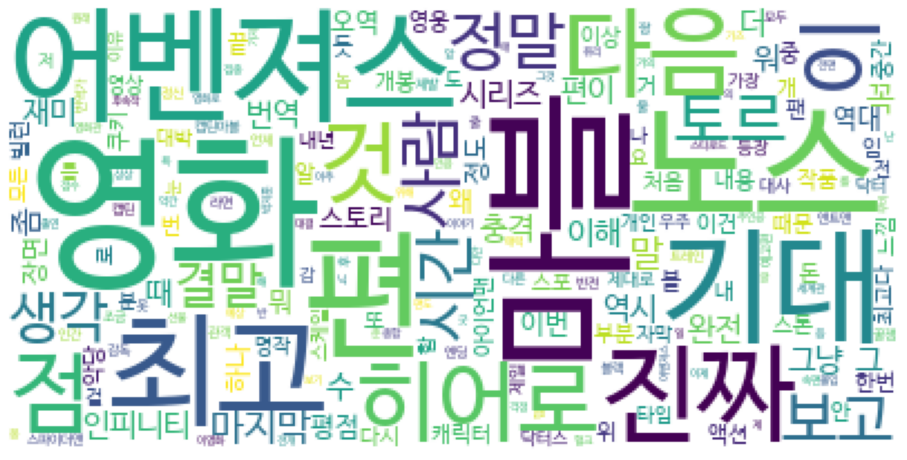

In [129]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

In [134]:
from konlpy.tag import Okt  

okt = Okt() 
    
# 부정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in neg_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

count = Counter(nouns)    
len(count)


data = count.most_common(500)
data[:5]


!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


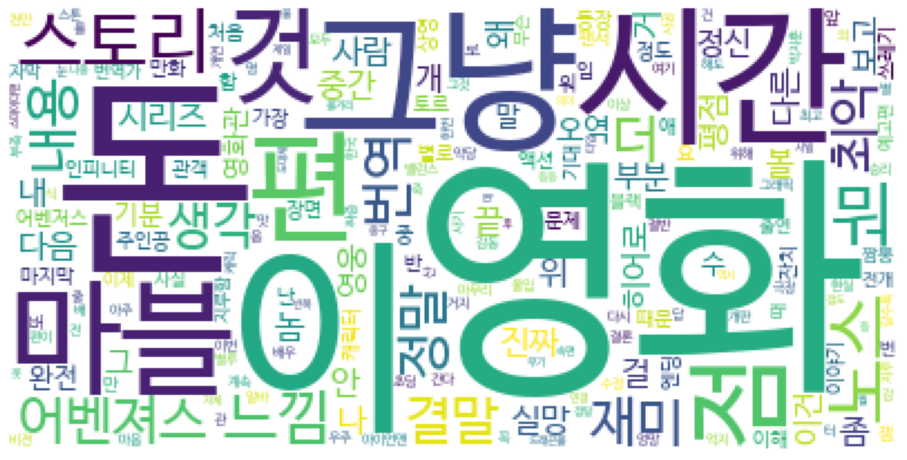

In [135]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10)) 
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()